In [54]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [39]:
data = pd.read_excel('SomervilleHapinnessSurvey.xlsx')
data.head()
data = data.dropna()
print(data.shape)
print(list(data.columns)) 

(143, 7)
['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'D']


In [40]:
data.dtypes

X1    int64
X2    int64
X3    int64
X4    int64
X5    int64
X6    int64
D     int64
dtype: object

## Pairwise correlations. 

In [41]:
data.corr(method='pearson', min_periods=1)

,X1,X2,X3,X4,X5,X6,D
X1,1.000000,0.092676,0.301971,0.104378,0.399203,0.417521,0.312740
X2,0.092676,1.000000,0.181081,0.107432,-0.002141,0.024546,0.019368
X3,0.301971,0.181081,1.000000,0.298898,0.329874,0.207006,0.163639
X4,0.104378,0.107432,0.298898,1.000000,0.269420,0.199151,0.113356
X5,0.399203,-0.002141,0.329874,0.269420,1.000000,0.307402,0.206685
X6,0.417521,0.024546,0.207006,0.199151,0.307402,1.000000,0.220729
D,0.312740,0.019368,0.163639,0.113356,0.206685,0.220729,1.000000


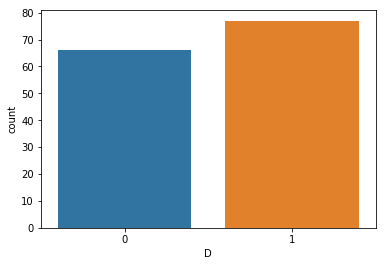

In [42]:
sns.countplot(x = 'D', data = data)  

## Declaring the dataframe.

In [43]:
X = data.loc[:, data.columns !='D']
y = data.D

## Partioning the dataset into training and test datasets. 

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 55) 
yt = y_test

## We do the zscore standardization of the dataset.

In [45]:
#Standardize the dataset by subtracting the mean and dividing bythe standard deviation (i.e. we use the z-score method)
mean = X_train.mean(axis = 0)   #This ensures we calculate mean along the columns
X_train -= mean
s = X_train.std(axis = 0)
X_train /= s

X_test -= mean      #We normalize the test data using the mean and standard deviation of the train data
X_test /= s

## Now define a decision tree classifier. 

In [46]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

## Fit the decision tree. 

In [49]:
clf = clf.fit(X_train, y_train)

## Now we plot the decision tree. 

In [50]:
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

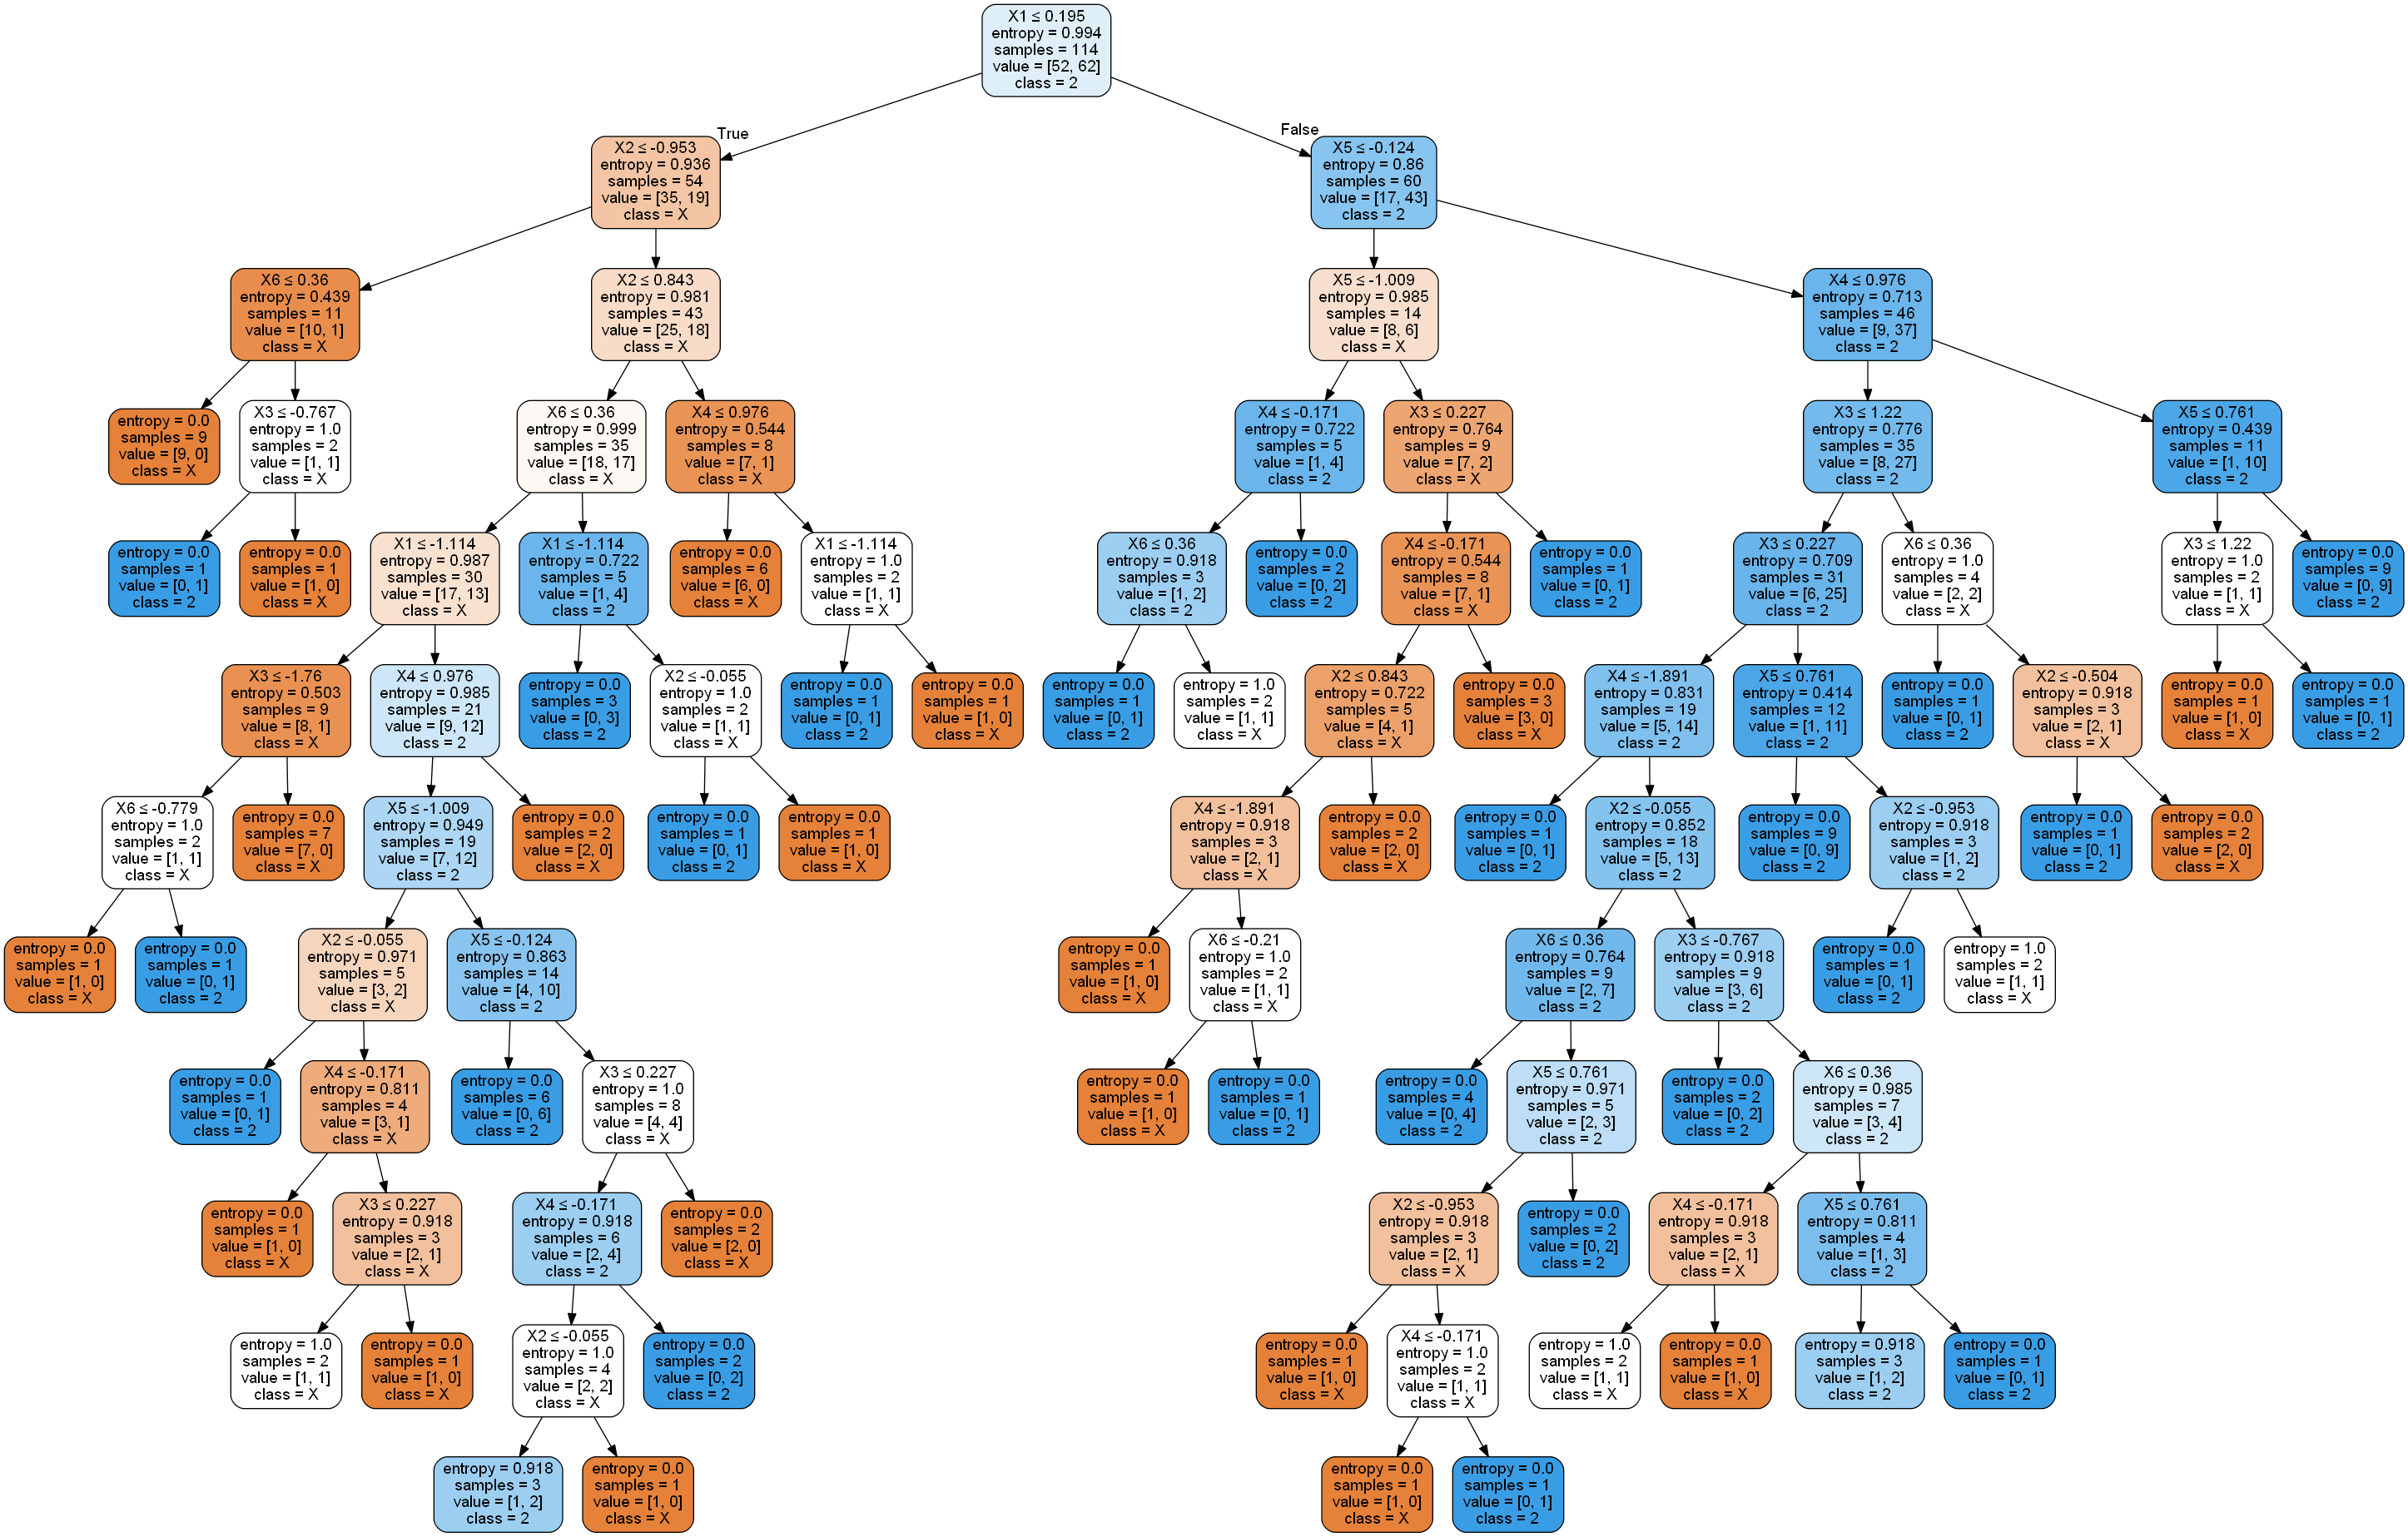

In [51]:
plot_decision_tree(clf, X_train.columns,data.columns[1]) 

## Predict the model. 

In [56]:
scores = clf.predict(X_test) 

## Testing the accuracy of the model. 

In [58]:
pd.crosstab(scores, yt, rownames = ['Predicted'], colnames = ['Actual'], margins = True, margins_name = 'Total') 

Actual,0,1,Total
Predicted,,,
0,10,9,19
1,4,6,10
Total,14,15,29
